In [0]:
# File location and type
file_location = "/FileStore/tables/Churn.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option('nanValue', ' ')\
  .option('nullValue', ' ')\
  .load(file_location)
df = df.drop('_c0')
display(df)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [0]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



In [0]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0| 

In [0]:
# Create a view or table

temp_table_name = "churn_analysis"

df.createOrReplaceTempView(temp_table_name)

In [0]:
pd_df = df.toPandas()

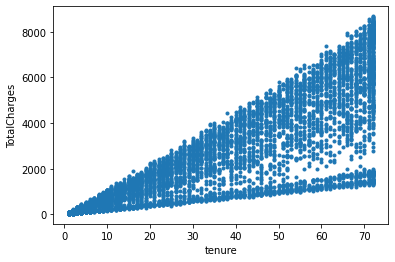

In [0]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['tenure'], pd_df['TotalCharges'], '.')
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
display()

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from churn_analysis

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [0]:
df.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|   No| 5174|
|  Yes| 1869|
+-----+-----+



In [0]:
df.select('tenure', 'TotalCharges', 'MonthlyCharges').describe().show()

+-------+------------------+------------------+------------------+
|summary|            tenure|      TotalCharges|    MonthlyCharges|
+-------+------------------+------------------+------------------+
|  count|              7043|              7032|              7043|
|   mean| 32.37114865824223|2283.3004408418697| 64.76169246059922|
| stddev|24.559481023094442| 2266.771361883145|30.090047097678482|
|    min|                 0|              18.8|             18.25|
|    max|                72|            8684.8|            118.75|
+-------+------------------+------------------+------------------+



In [0]:
%sql
select gender, churn, count(*) from churn_analysis group by gender, churn

gender,churn,count(1)
Male,No,2625
Male,Yes,930
Female,No,2549
Female,Yes,939


Output can only be rendered in Databricks

In [0]:
%sql
select SeniorCitizen, churn, count(*) from churn_analysis group by SeniorCitizen, churn

SeniorCitizen,churn,count(1)
1,No,666
0,No,4508
0,Yes,1393
1,Yes,476


Output can only be rendered in Databricks

In [0]:
%sql
select cast (tenure as int), churn, count(churn) from churn_analysis group by tenure, churn order by cast(tenure as int)

tenure,churn,count(churn)
0,No,11
1,No,233
1,Yes,380
2,No,115
2,Yes,123
3,Yes,94
3,No,106
4,No,93
4,Yes,83
5,No,69


Output can only be rendered in Databricks

In [0]:
df.stat.crosstab("SeniorCitizen", "InternetService").show()

+-----------------------------+----+-----------+----+
|SeniorCitizen_InternetService| DSL|Fiber optic|  No|
+-----------------------------+----+-----------+----+
|                            0|2162|       2265|1474|
|                            1| 259|        831|  52|
+-----------------------------+----+-----------+----+



In [0]:
df.stat.freqItems(["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"], 0.6).collect()

Out[25]: [Row(PhoneService_freqItems=['Yes'], MultipleLines_freqItems=['Yes'], InternetService_freqItems=['Fiber optic'], OnlineSecurity_freqItems=['No'], OnlineBackup_freqItems=['Yes'], DeviceProtection_freqItems=['No'], TechSupport_freqItems=['No'], StreamingTV_freqItems=['Yes'], StreamingMovies_freqItems=['No'])]

In [0]:
%sql
select PaperlessBilling, churn, count(*) from churn_analysis group by PaperlessBilling, churn 

PaperlessBilling,churn,count(1)
Yes,Yes,1400
No,No,2403
Yes,No,2771
No,Yes,469


Output can only be rendered in Databricks

In [0]:
%sql
select PaymentMethod, churn, count(*) from churn_analysis group by PaymentMethod, churn

PaymentMethod,churn,count(1)
Credit card (automatic),No,1290
Bank transfer (automatic),No,1286
Mailed check,Yes,308
Credit card (automatic),Yes,232
Electronic check,No,1294
Electronic check,Yes,1071
Bank transfer (automatic),Yes,258
Mailed check,No,1304


Output can only be rendered in Databricks

In [0]:
churn_df = df
(train_data, test_data) = churn_df.randomSplit([0.7, 0.3], 24)

print("Records for training: " + str(train_data.count()))
print("Records for Evaluation: " + str(test_data.count()))

Records for training: 4942
Records for Evaluation: 2101


In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

catColumns = ["gender", "SeniorCitizen","Partner", "Dependents" ,"PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]

In [0]:
stages = []
for catCol in catColumns:
    stringIndexer = StringIndexer(inputCol= catCol, outputCol= catCol + "Index")
    encoder = OneHotEncoder(inputCols= [stringIndexer.getOutputCol()], outputCols= [catCol + "catVec"])
    stages += [stringIndexer, encoder]

In [0]:
stages

Out[36]: [StringIndexer_ae9b29306a3d,
 OneHotEncoder_4371b4700085,
 StringIndexer_17225ecccdc3,
 OneHotEncoder_94da16b22a4b,
 StringIndexer_0f16283d0e66,
 OneHotEncoder_74f3ce1c1206,
 StringIndexer_1aae6f26dcdd,
 OneHotEncoder_fd2b81045286,
 StringIndexer_c066d9e12ad3,
 OneHotEncoder_ef120a323e55,
 StringIndexer_6a82d8fc28c6,
 OneHotEncoder_311a877eae6d,
 StringIndexer_d80f27a7c5cd,
 OneHotEncoder_8146bf72c463,
 StringIndexer_53aaaadd60e8,
 OneHotEncoder_7852680743e5,
 StringIndexer_6f678694812c,
 OneHotEncoder_ee36547e0629,
 StringIndexer_4765074c42e9,
 OneHotEncoder_53bbde9a2434,
 StringIndexer_aa3cec46cc7e,
 OneHotEncoder_12abbaa52a49,
 StringIndexer_cef4fd281377,
 OneHotEncoder_09372fc9c74f,
 StringIndexer_8be4fbc44f51,
 OneHotEncoder_a0224cabc841,
 StringIndexer_9bbd35dff896,
 OneHotEncoder_fdc6dc81bf0a,
 StringIndexer_833335e95639,
 OneHotEncoder_c1c8e68d78c1,
 StringIndexer_e425ac7ce24f,
 OneHotEncoder_c15e2d909556]

In [0]:
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols= ["TotalCharges"], outputCols= ["Out_TotalCharges"])
stages += [imputer]

In [0]:
label_idx = StringIndexer(inputCol= "Churn", outputCol= "label")
stages += [label_idx]

In [0]:
temp = label_idx.fit(train_data).transform(train_data)

In [0]:
temp.show(1)

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|label|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-----+
|0002-ORFBO|Female|            0|    Yes|       Yes|     9|         Yes|           No|            DSL|            No|         Yes|              No|        Yes|        Yes|             No|One year|

In [0]:
df.stat.corr('TotalCharges', 'MonthlyCharges')

Out[43]: 0.6511738315787813

In [0]:
%sql
select cast (tenure as int), churn, count(*) as churned from churn_analysis where churn = 'Yes' group by tenure, churn order by cast(tenure as int)

tenure,churn,churned
1,Yes,380
2,Yes,123
3,Yes,94
4,Yes,83
5,Yes,64
6,Yes,40
7,Yes,51
8,Yes,42
9,Yes,46
10,Yes,45


In [0]:
from pyspark.ml.feature import QuantileDiscretizer
tenure_bin = QuantileDiscretizer(numBuckets= 3, inputCol= "tenure", outputCol= "tenure_bin")
stages += [tenure_bin]

In [0]:
stages

Out[46]: [StringIndexer_ae9b29306a3d,
 OneHotEncoder_4371b4700085,
 StringIndexer_17225ecccdc3,
 OneHotEncoder_94da16b22a4b,
 StringIndexer_0f16283d0e66,
 OneHotEncoder_74f3ce1c1206,
 StringIndexer_1aae6f26dcdd,
 OneHotEncoder_fd2b81045286,
 StringIndexer_c066d9e12ad3,
 OneHotEncoder_ef120a323e55,
 StringIndexer_6a82d8fc28c6,
 OneHotEncoder_311a877eae6d,
 StringIndexer_d80f27a7c5cd,
 OneHotEncoder_8146bf72c463,
 StringIndexer_53aaaadd60e8,
 OneHotEncoder_7852680743e5,
 StringIndexer_6f678694812c,
 OneHotEncoder_ee36547e0629,
 StringIndexer_4765074c42e9,
 OneHotEncoder_53bbde9a2434,
 StringIndexer_aa3cec46cc7e,
 OneHotEncoder_12abbaa52a49,
 StringIndexer_cef4fd281377,
 OneHotEncoder_09372fc9c74f,
 StringIndexer_8be4fbc44f51,
 OneHotEncoder_a0224cabc841,
 StringIndexer_9bbd35dff896,
 OneHotEncoder_fdc6dc81bf0a,
 StringIndexer_833335e95639,
 OneHotEncoder_c1c8e68d78c1,
 StringIndexer_e425ac7ce24f,
 OneHotEncoder_c15e2d909556,
 Imputer_d86f55262759,
 StringIndexer_bb566a3c022a,
 QuantileDi

In [0]:
numericCols = ["tenure_bin", "Out_TotalCharges", "MonthlyCharges"]
assembleInputs = assemblerInputs = [c + "catVec" for c in catColumns] + numericCols
assembler = VectorAssembler(inputCols= assembleInputs, outputCol= "features")
stages += [assembler]

In [0]:
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(train_data)

In [0]:
trainprepDF = pipelineModel.transform(train_data)
testprepDF = pipelineModel.transform(test_data)

In [0]:
trainprepDF.head(1)

Out[50]: [Row(customerID='0002-ORFBO', gender='Female', SeniorCitizen=0, Partner='Yes', Dependents='Yes', tenure=9, PhoneService='Yes', MultipleLines='No', InternetService='DSL', OnlineSecurity='No', OnlineBackup='Yes', DeviceProtection='No', TechSupport='Yes', StreamingTV='Yes', StreamingMovies='No', Contract='One year', PaperlessBilling='Yes', PaymentMethod='Mailed check', MonthlyCharges=65.6, TotalCharges=593.3, Churn='No', genderIndex=1.0, gendercatVec=SparseVector(1, {}), SeniorCitizenIndex=0.0, SeniorCitizencatVec=SparseVector(1, {0: 1.0}), PartnerIndex=1.0, PartnercatVec=SparseVector(1, {}), DependentsIndex=1.0, DependentscatVec=SparseVector(1, {}), PhoneServiceIndex=0.0, PhoneServicecatVec=SparseVector(1, {0: 1.0}), MultipleLinesIndex=0.0, MultipleLinescatVec=SparseVector(2, {0: 1.0}), InternetServiceIndex=1.0, InternetServicecatVec=SparseVector(2, {1: 1.0}), OnlineSecurityIndex=0.0, OnlineSecuritycatVec=SparseVector(2, {0: 1.0}), OnlineBackupIndex=1.0, OnlineBackupcatVec=Spars

In [0]:
trainprepDF.select("tenure_bin").show()

+----------+
|tenure_bin|
+----------+
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       2.0|
|       0.0|
|       2.0|
|       2.0|
|       0.0|
|       2.0|
|       1.0|
|       0.0|
|       1.0|
|       0.0|
|       0.0|
|       0.0|
|       2.0|
|       2.0|
+----------+
only showing top 20 rows



In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol= "label", featuresCol= "features", maxIter = 10)
lrModel = lr.fit(trainprepDF)

In [0]:
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: [0.06066969073272598,-0.22681189476979505,-0.10111963845096024,0.22195678633360802,-0.44870218380824783,-0.20753447426954025,0.04846058088029331,0.5843521590261308,-0.37402531760289437,0.28815319240504783,-0.060743474530632065,0.19617490854545455,0.05002780754009685,0.15383995645016696,0.09608845219080751,0.2765848020785874,-0.04582027862785427,-0.016340671790315304,0.26849060854229395,0.03185151982488678,0.21818128111759774,0.8222053558852284,-0.7697233010300014,0.32906753510585907,0.4682708014514416,0.10960985485687674,0.15114733647265546,-0.6842093859280642,-0.00011360906347222898,0.005837299290934226]
Intercept: -1.9826656926403183


In [0]:
summary = lrModel.summary

In [0]:
accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fMeasure = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s\nAUROC: %s" % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall, summary.areaUnderROC))

Accuracy: 0.8043302306758398
FPR: 0.3674638712288351
TPR: 0.8043302306758398
F-measure: 0.7975531161841483
Precision: 0.7952879516373692
Recall: 0.8043302306758398
AUROC: 0.85053014381932


In [0]:
display(lrModel, trainprepDF, "ROC")

False Positive Rate,True Positive Rate,Threshold
0.0,0.0,0.8419432050372755
0.0,0.029411764705882353,0.8419432050372755
0.0,0.058823529411764705,0.8242221377156551
0.0,0.08823529411764706,0.797117563644995
0.0,0.11764705882352941,0.7739361379980982
0.013333333333333334,0.11764705882352941,0.7701780574448021
0.02666666666666667,0.11764705882352941,0.745826317329088
0.02666666666666667,0.14705882352941177,0.73715697486427
0.02666666666666667,0.17647058823529413,0.7367349331486951
0.02666666666666667,0.20588235294117646,0.7144162963391331


In [0]:
display(lrModel, trainprepDF, "fittedVsResiduals")

fitted values,residuals
-0.46579631827732143,-0.38561168005323454
1.3683754955978045,0.20288243635500502
-0.9510484634148781,0.7213259835945184
-0.33162100542136974,0.5821537400790489
-0.35735023405325583,-0.4116011505542756
0.11907605562259915,0.47026611112720795
-1.993263018742854,-0.11991207844293617
-4.790487644298201,-0.008239944056511184
-0.9619453265289326,0.7235111228006995
-4.663974125232625,-0.009340842133528926


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
pred = lrModel.transform(testprepDF)
evalLR = BinaryClassificationEvaluator(rawPredictionCol= "prediction")
auc = evalLR.evaluate(pred)

print("AUROC: %g" % auc)
evalLR.getMetricName()

AUROC: 0.709829
Out[61]: 'areaUnderROC'

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

results = pred.select(['prediction', 'label'])

results_collect = results.collect()
results_list = [(float(i[0]), float(i[1])) for i in results_collect]
predAndLabels = sc.parallelize(results_list)

metrics = BinaryClassificationMetrics(predAndLabels)

print("Area under PR = %s" % metrics.areaUnderPR)
print("Area under ROC = %s" % metrics.areaUnderROC)
pred.show(1)

Area under PR = 0.5481306018747679
Area under ROC = 0.709829404744659
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+--------------------+--------------+------------+-----+-----------+-------------+------------------+-------------------+------------+-------------+---------------+----------------+-----------------+------------------+------------------+-------------------+--------------------+---------------------+-------------------+--------------------+-----------------+------------------+---------------------+----------------------+----------------+-----------------+----------------+-----------------+--------------------+---------------------+-------------+--------------+---------------------+----------------------+------------------+-------------------+----------------+-----+----------+--------------------+--------------

In [0]:
test_data.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|   No| 1534|
|  Yes|  567|
+-----+-----+



In [0]:
count = pred.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = tp = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp + tn)/ count
precision = tp/ (tp + fp)
recall = tp/ (tp + fn)

print("Correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s" % (correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))

Correct: 1661
Wrong: 440
tp: 264
fp: 176
fn: 264
tn: 1358
Accuracy: 0.772013326987149
Precision: 0.6
Recall: 0.5


In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [5, 10, 20])
             .build())

In [0]:
cv = CrossValidator(estimator= lr, estimatorParamMaps= paramGrid, evaluator=evalLR, numFolds=5)

cvModel = cv.fit(trainprepDF)

In [0]:
pred = cvModel.bestModel.transform(testprepDF)

In [0]:
evalLR.evaluate(pred)

Out[70]: 0.7082956800470925

In [0]:
results = pred.select(['prediction', 'label'])
count = pred.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = tp = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp + tn)/ count
precision = tp/ (tp + fp)
recall = tp/ (tp + fn)

print("Correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s" % (correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))

Correct: 1658
Wrong: 443
tp: 265
fp: 178
fn: 265
tn: 1356
Accuracy: 0.7715373631603998
Precision: 0.5981941309255079
Recall: 0.5


In [0]:
cvModel.explainParams()

Out[72]: "estimator: estimator to be cross-validated (current: LogisticRegression_b36d4302b45b)\nestimatorParamMaps: estimator param maps (current: [{Param(parent='LogisticRegression_b36d4302b45b', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_b36d4302b45b', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_b36d4302b45b', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_b36d4302b45b', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_b36d4302b45b', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_b36d4302b45b', name='maxIter', doc='max number of i

In [0]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol= "label", featuresCol= "features").setImpurity("gini").setMaxDepth(6).setNumTrees(50).setFeatureSubsetStrategy("auto").setSeed(1010)

rfmodel = rf.fit(trainprepDF)

In [0]:
pred = rfmodel.transform(testprepDF)

In [0]:
results = pred.select(['prediction', 'label'])
count = pred.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = tp = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp + tn)/ count
precision = tp/ (tp + fp)
recall = tp/ (tp + fn)

print("Correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s" % (correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))

Correct: 1647
Wrong: 454
tp: 334
fp: 120
fn: 334
tn: 1414
Accuracy: 0.831984769157544
Precision: 0.73568281938326
Recall: 0.5
